<a href="https://colab.research.google.com/github/shakedCohen11/K--SubSpaces-and-Anomaly-Detection-/blob/main/Assignment_2_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Data Loading & Classification - COVID-19 


**Deep Learning and Its Applications to Signal and Image Processing and Analysis, 361-2-1120**

**Ron Sofer - soferron@post.bgu.ac.il**

**Tal Ben Haim - benhait@post.bgu.ac.il**


In the following assignment we will create a dataset and costum model for classification of pneumonia cases.
We will try two types of classification - coarse classification to 3 classes (Bacterial, Viral, Fungal), and fine classification to each of the genus/specesies type of pneumonia.

The assignment will hopefully give you the to[link text](https://)ols needed to create a dataset for your own research challanges.




# The data
Import some basic packages

In [34]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path

Clone COVID-19 X-Ray dataset repository

https://github.com/ieee8023/covid-chestxray-dataset

The data consists of X-ray images of pneumonia cases gathered from different sources. The data is updated on an almost daily basis.

Please refer to the link to read about the given data.
Additional info can be found in the dataset paper :
https://arxiv.org/abs/2003.11597


In [35]:
#We can use "!" to run bash commands in google colab
#The following command will download the latest available data from the git repository
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


Set images and metadata files path and examine data

In [36]:
images_path = Path("covid-chestxray-dataset/images")
metadata_path = Path("covid-chestxray-dataset/metadata.csv")

We use pandas to convert the metadata CSV to a dataframe object.

If you are unfamiliar with pandas please refer to:

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [37]:
metadata = pd.read_csv(metadata_path)

A look at the metadata:

You can read the paper for description of the data contents. 

In [38]:
metadata.head(10)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
5,4,5.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
6,5,NaN,NaN,NaN,Pneumonia,NaN,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,NaN,NaN
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
8,6,4.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 10, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [39]:
#List the images
list(images_path.glob("*"))[0:10]

[PosixPath('covid-chestxray-dataset/images/65a95c1d86c9a79e3bf88d654c517c_jumbo.jpg'),
 PosixPath('covid-chestxray-dataset/images/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg'),
 PosixPath('covid-chestxray-dataset/images/000001-11.jpg'),
 PosixPath('covid-chestxray-dataset/images/tpmd200203f2-a.png'),
 PosixPath('covid-chestxray-dataset/images/19073f37.jpg'),
 PosixPath('covid-chestxray-dataset/images/B59DD164-51D5-40DF-A926-6A42DD52EBE8.jpeg'),
 PosixPath('covid-chestxray-dataset/images/1f8a4a54.jpg'),
 PosixPath('covid-chestxray-dataset/images/d815245ec98b5f0efc73b89daef72c_jumbo.jpg'),
 PosixPath('covid-chestxray-dataset/images/5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg'),
 PosixPath('covid-chestxray-dataset/images/radiol.2020201160.fig2a.jpeg')]

Visualize some cases

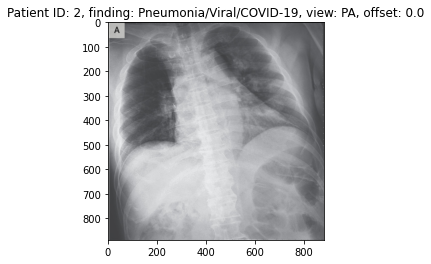

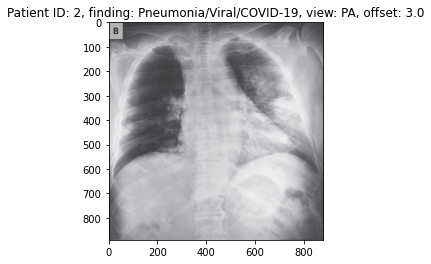

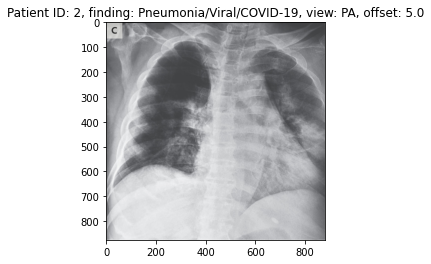

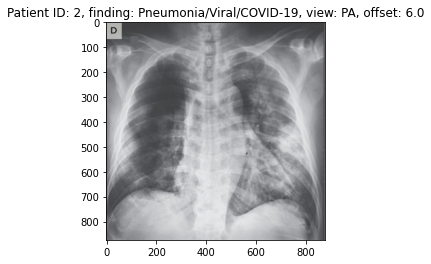

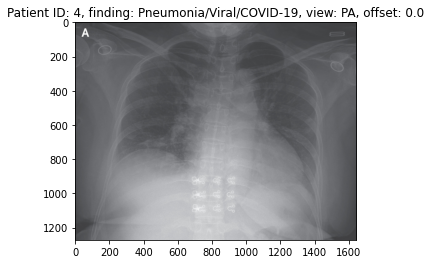

In [40]:
for index, case in metadata.head(5).iterrows():
  image_path = images_path / case["filename"]
  plt.figure()
  plt.title("Patient ID: {0}, finding: {1}, view: {2}, offset: {3}".format(case["patientid"],case["finding"],case["view"],case["offset"]))
  plt.imshow(plt.imread(image_path),cmap='gray')
plt.show()

# Process the data
Write your own code to filter the metadata dataframe to contain only posteroanterior - "PA" (back-to-front) views.

Return a dataframe that contains finding/full filepath as in the following figure: 
<table>
  <tr>
    <th></th>
    <th>finding</th>
    <th>filepath</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Pneumonia/Viral/COVID-19</td>
    <td>some/file/path</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pneumonia/Viral/COVID-19</td>
    <td>another/file/path</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pneumonia/Viral/SARS</td>
    <td>some/other/file/path</td>
  </tr>
    <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In [41]:
### Fill in your code

In [42]:
metadata.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

In [43]:
# new_metadat = metadata[['finding','filepath']]
new_metadat = metadata[metadata['view'] == 'PA']
new_metadat

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,471,51.0,M,20.0,Pneumonia/Viral/COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2020,United Kingdom,images,16953_4_1.jpg,NaN,https://www.eurorad.org/case/16953,CC BY-NC-SA 4.0,A 20-year-old male with a history of asthma pr...,NaN,NaN
933,471,72.0,M,20.0,Pneumonia/Viral/COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2020,United Kingdom,images,16953_5_1.jpg,NaN,https://www.eurorad.org/case/16953,CC BY-NC-SA 4.0,A 20-year-old male with a history of asthma pr...,NaN,NaN
936,474,NaN,M,55.0,Pneumonia/Viral/COVID-19,Unclear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2020,"Al Hasa, Saudi Arabia",images,2edb88df42cab5e5fbc18b3965e0bd_jumbo.jpeg,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,"Fever, abdominal pain and diarrhea. No cough o...","Case courtesy of Dr Osama Rizk, Radiopaedia.o...",NaN
939,476,3.0,M,25.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,PA,X-ray,2020,"Hospital Universitario Severo Ochoa, Madrid, S...",images,16865_1_1.jpg,NaN,https://www.eurorad.org/case/16865,CC BY-NC-SA 4.0,A 25 year-old male resident presented with a 7...,NaN,NaN


In [44]:
new_metadat = new_metadat[['finding','filename']]
new_metadat

,finding,filename
0,Pneumonia/Viral/COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,Pneumonia/Viral/COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,Pneumonia/Viral/COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,Pneumonia/Viral/COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,Pneumonia/Viral/COVID-19,nejmc2001573_f1a.jpeg
...,...,...
932,Pneumonia/Viral/COVID-19,16953_4_1.jpg
933,Pneumonia/Viral/COVID-19,16953_5_1.jpg
936,Pneumonia/Viral/COVID-19,2edb88df42cab5e5fbc18b3965e0bd_jumbo.jpeg
939,Pneumonia/Viral/COVID-19,16865_1_1.jpg


In [45]:
new_metadat['filename'] = str(images_path) + '/' +new_metadat["filename"].astype(str) 
new_metadat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,finding,filename
0,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-a-20...
1,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-b-20...
2,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-c-20...
3,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-d-20...
4,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/nejmc2001573_f1...
...,...,...
932,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_4_1.jpg
933,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_5_1.jpg
936,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/2edb88df42cab5e...
939,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16865_1_1.jpg


In [46]:
new_metadat = new_metadat.rename(columns={"filename": "filepath"})
new_metadat

,finding,filepath
0,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-a-20...
1,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-b-20...
2,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-c-20...
3,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-d-20...
4,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/nejmc2001573_f1...
...,...,...
932,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_4_1.jpg
933,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_5_1.jpg
936,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/2edb88df42cab5e...
939,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16865_1_1.jpg


**Add label column to data**

Convert findings from string to numeric classes, using the following dictionary:


```
finding_to_label = {'No Finding':0,
 'Pneumonia':1,
 'Pneumonia/Aspiration':2,
 'Pneumonia/Bacterial':3,
 'Pneumonia/Bacterial/Chlamydophila':4,
 'Pneumonia/Bacterial/E.Coli':5,
 'Pneumonia/Bacterial/Klebsiella':6,
 'Pneumonia/Bacterial/Legionella':7,
 'Pneumonia/Bacterial/Mycoplasma':8,
 'Pneumonia/Bacterial/Nocardia':9,
 'Pneumonia/Bacterial/Staphylococcus/MRSA':10,
 'Pneumonia/Bacterial/Streptococcus':11,
 'Pneumonia/Fungal/Aspergillosis':12,
 'Pneumonia/Fungal/Pneumocystis':13,
 'Pneumonia/Lipoid':14,
 'Pneumonia/Viral/COVID-19':15,
 'Pneumonia/Viral/Herpes ':16,
 'Pneumonia/Viral/Influenza':17,
 'Pneumonia/Viral/Influenza/H1N1':18,
 'Pneumonia/Viral/MERS-CoV':19,
 'Pneumonia/Viral/SARS':20,
 'Pneumonia/Viral/Varicella':21,
 'Tuberculosis':22,
 'Unknown':23,
 'todo':24}
label_to_finding = {v: k for k, v in finding_to_label.items()}
```

You should add two new columns to the dataframe contains labels for each classficaion task mentioned above (coarse and fine)

Validate your data. Are there any cases with invalid class?

Drop meaningless labels (and their corresponding row), explain your choices.




In [47]:
coarse_dic = ['Aspiration','Bacterial','Fungal','Lipoid','Viral','Tuberculosis','Unknown']

In [48]:
### Fill in your code

In [49]:
finding_to_label = {'No Finding':0,
 'Pneumonia':1,
 'Pneumonia/Aspiration':2,
 'Pneumonia/Bacterial':3,
 'Pneumonia/Bacterial/Chlamydophila':4,
 'Pneumonia/Bacterial/E.Coli':5,
 'Pneumonia/Bacterial/Klebsiella':6,
 'Pneumonia/Bacterial/Legionella':7,
 'Pneumonia/Bacterial/Mycoplasma':8,
 'Pneumonia/Bacterial/Nocardia':9,
 'Pneumonia/Bacterial/Staphylococcus/MRSA':10,
 'Pneumonia/Bacterial/Streptococcus':11,
 'Pneumonia/Fungal/Aspergillosis':12,
 'Pneumonia/Fungal/Pneumocystis':13,
 'Pneumonia/Lipoid':14,
 'Pneumonia/Viral/COVID-19':15,
 'Pneumonia/Viral/Herpes ':16,
 'Pneumonia/Viral/Influenza':17,
 'Pneumonia/Viral/Influenza/H1N1':18,
 'Pneumonia/Viral/MERS-CoV':19,
 'Pneumonia/Viral/SARS':20,
 'Pneumonia/Viral/Varicella':21,
 'Tuberculosis':22,
 'Unknown':23,
 'todo':24}
label_to_finding = {v: k for k, v in finding_to_label.items()}

In [50]:
new_metadat = new_metadat.replace(finding_to_label)
new_metadat

,finding,filepath
0,15,covid-chestxray-dataset/images/auntminnie-a-20...
1,15,covid-chestxray-dataset/images/auntminnie-b-20...
2,15,covid-chestxray-dataset/images/auntminnie-c-20...
3,15,covid-chestxray-dataset/images/auntminnie-d-20...
4,15,covid-chestxray-dataset/images/nejmc2001573_f1...
...,...,...
932,15,covid-chestxray-dataset/images/16953_4_1.jpg
933,15,covid-chestxray-dataset/images/16953_5_1.jpg
936,15,covid-chestxray-dataset/images/2edb88df42cab5e...
939,15,covid-chestxray-dataset/images/16865_1_1.jpg


**Add your explanations here**


...

...

...



**Split Data**

Split your data randomly to train (80%) and validation (20%) dataframes (use random seed for repreduciable results).

In [51]:
### Fill in your code

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_metadat, test_size=0.2)


In [53]:
train

,finding,filepath
811,19,covid-chestxray-dataset/images/1-s2.0-S0378603...
520,1,covid-chestxray-dataset/images/000001-12.jpg
176,15,covid-chestxray-dataset/images/covid-19-pneumo...
851,24,covid-chestxray-dataset/images/0957ce54.jpg
496,15,covid-chestxray-dataset/images/a8ac1969.jpg
...,...,...
432,15,covid-chestxray-dataset/images/f6575117.jpg
755,18,covid-chestxray-dataset/images/000001-1.jpg
204,13,covid-chestxray-dataset/images/pneumocystis-ji...
907,22,covid-chestxray-dataset/images/b2f42e0cdfcbe32...


# Create tf.Dataset
Create a tf.Dataset object from the train data, in which every entry has the label and the image.
Repeat for validation data.

Steps:
1.   Create a tf.dataset object from the dataframe. [1]
2.   Write a function that parse the data from each dataset entry to class/image [2]
3.   Apply the function on the dataset using tf.Dataset.map [2]

See:

[1] tf.dataset from pandas dataframe : https://www.tensorflow.org/tutorials/load_data/pandas_dataframe#load_data_using_tfdatadataset
[2] Image loading : https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata

* **Step 1 - Create a tf.dataset object from the dataframe, each entry should contain filename and class.**

In [54]:
### Fill in your code
train_ds = tf.data.Dataset.from_tensor_slices((train['filepath'].values, train['finding'].values))
test_ds = tf.data.Dataset.from_tensor_slices((test['filepath'].values, test['finding'].values))


  Test your dataset object:

In [55]:
for filename, label in train_ds.take(5):
  print ('Filename: {}, Label: {}'.format(filename, label))

Filename: b'covid-chestxray-dataset/images/1-s2.0-S0378603X1500248X-gr2b.jpg', Label: 19
Filename: b'covid-chestxray-dataset/images/000001-12.jpg', Label: 1
Filename: b'covid-chestxray-dataset/images/covid-19-pneumonia-30-PA.jpg', Label: 15
Filename: b'covid-chestxray-dataset/images/0957ce54.jpg', Label: 24
Filename: b'covid-chestxray-dataset/images/a8ac1969.jpg', Label: 15


* **Step 2 - Write a function to parse the image file name and return a grayscale image , resized to 512X512**.

> The mapping function will run each time a batch is fetched. the input is your dataset entry - (filepath,label) and the output should be (img,label).
\
Note that once the you read the image using tensorflow (tf.io.read_file), your operations should be on Tensors. 

> You can use a mapping function to tranform the data randomly each time a batch is fetched for data augmentation. 
https://www.tensorflow.org/tutorials/images/data_augmentation


(448, 420)


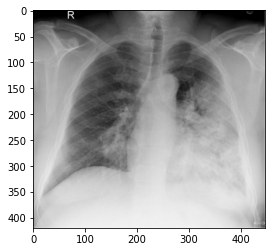

In [56]:
# plt.imshow(plt.imread(image_path),cmap='gray')
for filename, label in train_ds.take(1):
    img = Image.open(filename.numpy())
    print(img.size)
    plt.imshow(img)

In [74]:
RESIZE_SHAPE = [1024,1024]

In [57]:
### Student code
def decode_img(img):
  ### Fill in your code
  img = tf.image.decode_jpeg(img, channels=1)
  img = tf.image.resize(img,RESIZE_SHAPE)
  return img


def map_function(filename,label):
  ### Fill in your code
  # decoded_img = decode_img(filename)
  # decoded_img = tf.io.decode_image(filename)
  img = tf.io.read_file(filename)
  decoded_img = decode_img(img)

  return decoded_img, label



* Step 3 - Apply the mapping function on the dataset

In [58]:
### Fill in your code
train_ds = train_ds.map(map_function)
test_ds = test_ds.map(map_function)

Test your dataset:

tf.Tensor([420 448   1], shape=(3,), dtype=int32)
tf.Tensor([361 373   1], shape=(3,), dtype=int32)


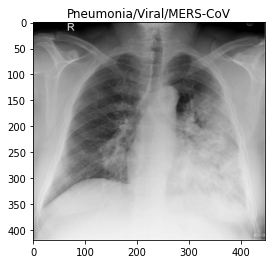

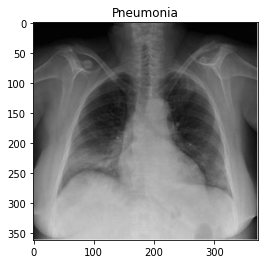

In [60]:
for image, label in train_ds.take(2):
  # print(tf.shape(image))
  plt.figure()
  plt.imshow(image.numpy().squeeze(),cmap='gray')
  plt.title(label_to_finding[label.numpy()])
plt.show()

In [68]:
# x=[]
# y=[]
data=[image.numpy().shape for image, label in train_ds]
df = pd.DataFrame(data, columns =['y', 'x', 'c'])
df=df.drop('c',axis=1)
df.head()


,y,x
0,420,448
1,361,373
2,3308,3670
3,1728,2022
4,2000,2000


In [73]:
# ax = df.plot.bar(x='x')
# mean = 
df.describe()

,y,x
count,275.000000,275.000000
mean,1144.370909,1194.756364
std,726.136009,737.890069
min,157.000000,165.000000
25%,562.000000,591.000000
50%,961.000000,1007.000000
75%,1561.000000,1717.000000
max,4095.000000,4280.000000


thus we choose 1024x1024 using the mean vlaue as a guide

Repeat the steps for the validation set.

In [27]:
  ### Fill in your code

**Data Augmentation**

Now, we want to add data augmentation to the training set.



\
Write a function that operates on entries of your dataset, and augments them, and then apply this function to your dataset.

You can use functions from tf.image.random_* to randomly augment your data as you process it.
For example, to randomly flip your image:

```
  img = tf.image.random_flip_left_right(img)
```



we want to add contrast and brightnes augs!

flipping and roatation 15,30,45,60 deg

In [ ]:
def augmentation(#Fill in the parameters):
  #Augment the data
  return #?

train_ds = #Fill in your code.

Test your data augmentation.
\
We will process the same entry several times and should see different results.

In [ ]:
subset = aug_train_ds.take(1)
plt.figure(figsize=(10,10))
for i in range (9):
  image, label = next(iter(subset))
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image.numpy().squeeze(),cmap='gray')
  plt.axis('off')
plt.show()

Explain the purpose of the chosen augmentation with an emphasis on the particular task.

# Prepare datasets for training
So far we defined datasets that can be used for training, but are not yet ready to process large amounts of data fast.

\\
We would like to make our dataset ready for fast batch processing.
The following function does that:
*   Cache your data - load it to your RAM/save it to file for faster access.
*   Shuffle your data.
*   Repeat the data - makes the iterator cyclic, so it will be repeated after each epoch, making an "infinite" dataset. This may be ommited, but the training process may differ.
*   Batch the data - fetch the data in batches, each batch has batch_size entries.
*   Prefetch the data - while you process one batch, the CPU will prefetch the next batches (including preprocessing and augmentations)


for further reading - https://www.tensorflow.org/guide/data


In [28]:
#Source https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata
def prepare_for_training(ds,batch_size=32, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  return ds

In [30]:
#Apply on your dataset
train_ds = prepare_for_training(train_ds)
# valid_ds = prepare_for_training(valid_ds)
test_ds = prepare_for_training(test_ds)

Visualize results

In [32]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n],cmap='gray')
      plt.title(label_to_finding[label_batch[n]])
      plt.axis('off')

In [33]:
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy().squeeze(), label_batch.numpy())

InvalidArgumentError: ignored

# Train a classification network

Now that you have a dataset ready, you are steps away from training your own classification network to help detect COVID-19 cases!


*   Build your classification model and fit it.
*   Add data augmentations
*   Try to use transfer learning (https://www.tensorflow.org/tutorials/images/transfer_learning)

For each classification task think about:
*  Are you overfitted? Why? What can you do?
*  Can the classes be distinguished?
*  What are the data limits? Can we filter/process it better?
*  Is it possible that we are classifying the X-Ray machine and not the case?
*  Which task is considered more simple? Back your statement on the results, and the data distribution.

Evaluate your model using different measures:
* Confusion matrix
* Accuracy
* Precision
* Recall (Sensitivity)
* Specificity
* Plot an [Receiver operating characteristic curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), and present the corresponding area under the curve (AUC)



**Answer the questions above here**

... 

... 

... 


In [ ]:
model = #Define your model

In [ ]:
#Compile and fit your model
model.compile()
model.fit()

In [ ]:
#Plot your training process. valid/train loss. are you over/under fitted?

In [ ]:
#Study the results and try to acheive best classification accuracy